# Wrangle and Analyze Data: Act Report

## Analyze & Visualize

I used the wrangled Twitter archive master data to communicate insights and create visualizations using Python libraries pandas, numpy, matplotlib.pyplot, and seaborn. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
twitter_final_clean = pd.read_csv('twitter_archive_master.csv')
twitter_final_clean.head()

,tweet_id,timestamp,source,text,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,...,prediction_2_confidence,prediction_2_dog,prediction_3,prediction_3_confidence,prediction_3_dog,retweets,favorites,followers,friends,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.085851,False,banana,0.076110,False,7718,36249,8783992,16,NaN
1,680798457301471234,2015-12-26 17:12:55+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Moofasa. He must be a powerful do...,NaN,https://twitter.com/dog_rates/status/680798457...,6,10,Moofasa,https://pbs.twimg.com/media/CXKuiyHUEAAMAGa.jpg,...,0.283795,False,ox,0.067455,False,1026,2838,8783894,16,NaN
2,680801747103793152,2015-12-26 17:25:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Great picture here. Dog on the right panicked ...,NaN,https://twitter.com/dog_rates/status/680801747...,10,10,NaN,https://pbs.twimg.com/media/CXKxkseW8AAjAMY.jpg,...,0.001439,True,Staffordshire_bullterrier,0.000518,True,814,2372,8783894,16,NaN
3,680889648562991104,2015-12-26 23:15:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cheesy. It's her birthday. She's patie...,NaN,https://twitter.com/dog_rates/status/680889648...,9,10,Cheesy,https://pbs.twimg.com/media/CXMBhXfWEAA4mMI.jpg,...,0.078331,True,Pomeranian,0.020407,True,361,1759,8783895,16,NaN
4,680913438424612864,2015-12-27 00:49:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Griswold. He's dapper as hell. Already pu...,NaN,https://twitter.com/dog_rates/status/680913438...,11,10,Griswold,https://pbs.twimg.com/media/CXMXKKHUMAA1QN3.jpg,...,0.126455,True,Chihuahua,0.087184,True,619,2394,8783895,16,NaN


In [3]:
twitter_final_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   timestamp                   2059 non-null   object 
 2   source                      2059 non-null   object 
 3   text                        2059 non-null   object 
 4   retweeted_status_timestamp  72 non-null     object 
 5   expanded_urls               2059 non-null   object 
 6   rating_numerator            2059 non-null   int64  
 7   rating_denominator          2059 non-null   int64  
 8   name                        1391 non-null   object 
 9   jpg_url                     2059 non-null   object 
 10  img_num                     2059 non-null   int64  
 11  prediction_1                2059 non-null   object 
 12  prediction_1_confidence     2059 non-null   float64
 13  prediction_1_dog            2059 

### Correlogram of Numerical Variables

First, I looked at th correlation between numerical variables _rating_numerator, retweets, favorites, followers,_ and _friends_ by creating a correlegoram.

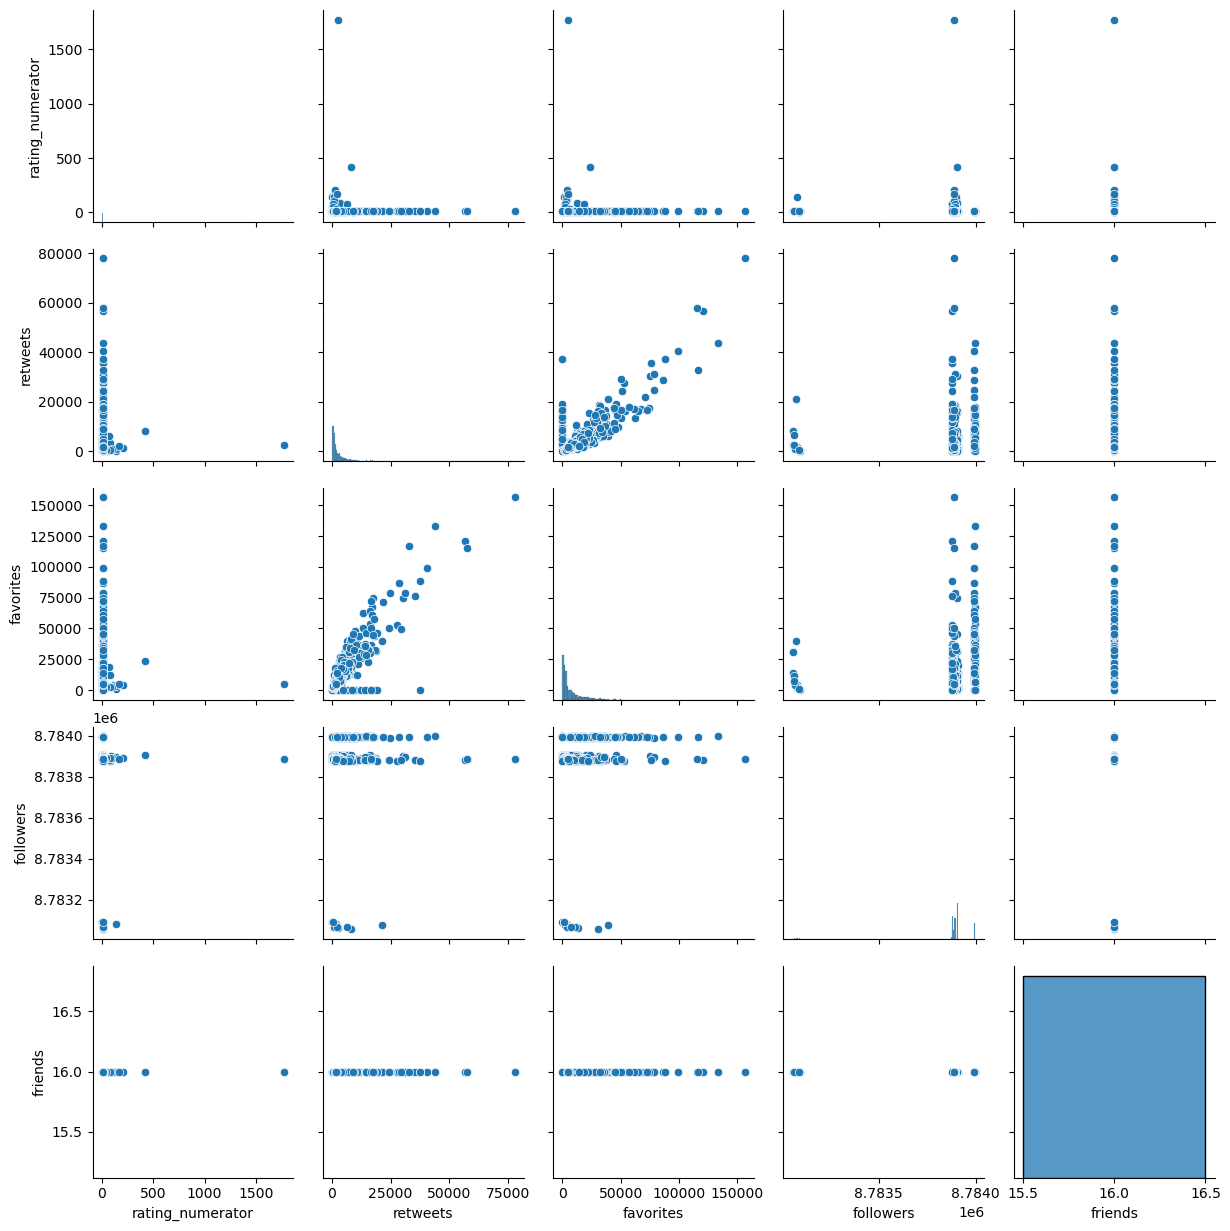

In [4]:
# Correlogram of variables rating_numerator, retweets, favorites, followers, friends
sns.pairplot(twitter_final_clean[['rating_numerator', 'retweets', 'favorites', 'followers', 'friends']], kind="scatter")
plt.show();

There is a positive correlation between _retweets_ and _favorites_. There doesn't seem to be any other particular correlation between the other numerical variables. In particular, rating has no effect on any other variables.

### Top Tweets by  Favorite Counts and Retweets

In [5]:
# Tweets with the most favorite counts 
twitter_final_clean.sort_values('favorites', ascending=False)[['tweet_id','prediction_1','favorites']].head()

,tweet_id,prediction_1,favorites
1788,744234799360020481,Labrador_retriever,156351
2047,822872901745569793,Lakeland_terrier,133176
1057,807106840509214720,Chihuahua,120812
1962,866450705531457537,French_bulldog,116535
1776,739238157791694849,Eskimo_dog,115512


In [6]:
# Tweets with the most retweets
twitter_final_clean.sort_values('retweets', ascending=False)[['tweet_id','prediction_1','retweets']].head()

,tweet_id,prediction_1,retweets
1788,744234799360020481,Labrador_retriever,77913
1776,739238157791694849,Eskimo_dog,57761
1057,807106840509214720,Chihuahua,56798
2047,822872901745569793,Lakeland_terrier,43883
1176,879415818425184262,English_springer,40610


Tweet id 744234799360020481 has the most retweets and favorite counts. Based on the neural network algorithm that classifies the dog breed, the breed of the dog is a Labrador retriever. The predicted dog breeds of the tweet with the highest favorite count are Labrador retriever, Lakeland terrier, Chihuahua, French bulldog, Eskimo dog, respectively and the most retweets are Labrador retriever, Eskmo dog, Chihuahua, Lakeland terrier, English springer, respectively.

### Rating, Favorite Counts, and Retweets by Dog Stage

Next, I looked at the value counts of the four dog stage(pupper, doggo, puppo, floofer) and created a pie chart. 

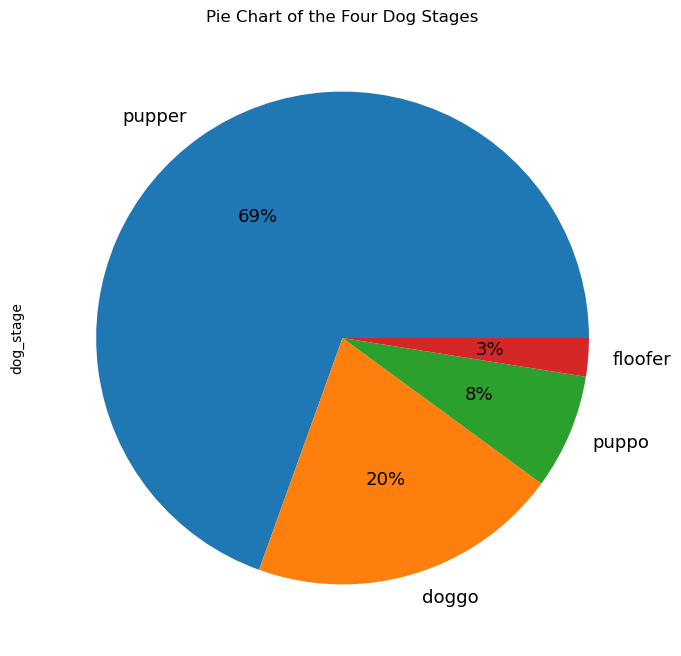

In [8]:
# Pie Chart of dog stage
twitter_final_clean.dog_stage.value_counts().plot.pie(figsize=(8, 8), autopct='%1.0f%%',
                                                      textprops={'fontsize': 13})
plt.title('Pie Chart of the Four Dog Stages');


Pupper is the most common dog stage in the WeRateDogs Twitter acouont. The percentage of dogs in pupper stage is 69%, doggo stage is 20%, puppo stage is 8%, and floofer stage is 3%. 

In [8]:
twitter_final_clean.groupby('dog_stage')['rating_numerator'].mean()

dog_stage
doggo      11.938462
floofer    11.875000
pupper     10.773756
puppo      12.041667
Name: rating_numerator, dtype: float64

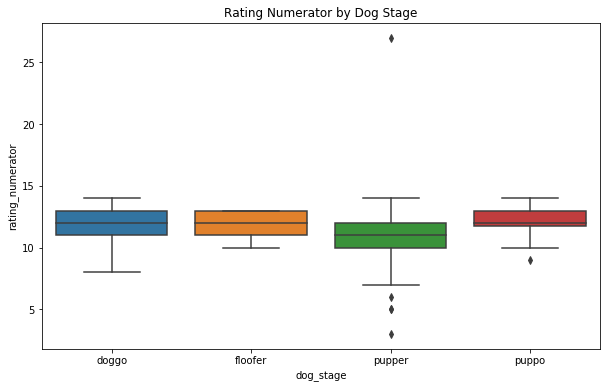

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "dog_stage", y = "rating_numerator", 
            data = twitter_final_clean).set_title('Rating Numerator by Dog Stage');

Tweets with dogs in pupper stage have the lowest rating numerators on average, and tweets with dogs in puppo stage have the highest rating numerators on average. The spread of the pupper stage rating numerator is the greatest with a few outliers. 

In [10]:
twitter_final_clean.groupby('dog_stage')['favorites'].mean()

dog_stage
doggo      18028.092308
floofer    12546.750000
pupper      6644.619910
puppo      21073.083333
Name: favorites, dtype: float64

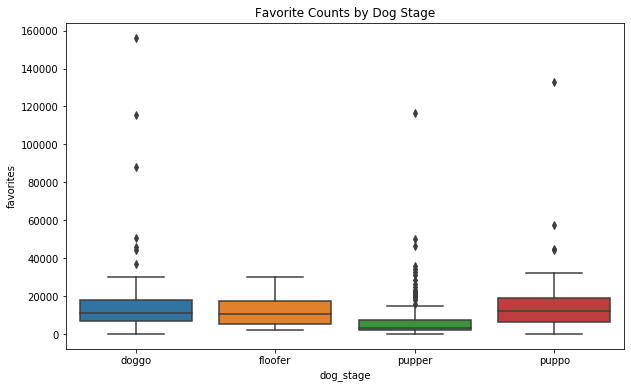

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "dog_stage", y = "favorites", 
            data = twitter_final_clean).set_title('Favorite Counts by Dog Stage');

Tweets with dogs in pupper stage have the lowest favorite counts on average, and tweets with dogs in puppo stage have the highest rating favorite counts on average. The spread of doggo stage favorite counts is the highest; some tweets have favorite counts higher than 100000. 

In [12]:
twitter_final_clean.groupby('dog_stage')['retweets'].mean()

dog_stage
doggo      7190.400000
floofer    4196.875000
pupper     2318.923077
puppo      6270.333333
Name: retweets, dtype: float64

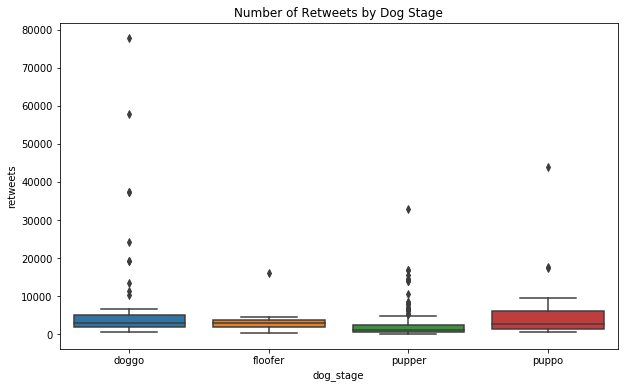

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x = "dog_stage", y = "retweets", 
            data = twitter_final_clean).set_title('Number of Retweets by Dog Stage');

Tweets with dogs in pupper stage have the lowest number of retweets on average, and tweets with dogs in doggo stage have the highest number of retweets on average. The spread of the number of retweets of doggo stage is the greatest with a few outliers; some doggo stage have number of retweets as high as over 50000. 